In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
import seaborn as sns
sns.set_style("whitegrid")
# Bigger font
# sns.set_context("poster")
sns.set_context("talk")
# Figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 4
# np.random.seed(123)

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
dataframe = pd.read_csv('data/loan_prediction.csv')
dataframe.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,5849,0.0,0.0,360.0,1.0,1
1,4583,1508.0,128.0,360.0,1.0,0


In [3]:
from sklearn.model_selection import train_test_split
X = dataframe.iloc[:, :-1]
y = dataframe.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

## Bagging

Bagging, also known as **Bootstrap aggregating**, is a parallel ensemble method. It is all about averaging slightly different versions of the same model to improve accuracy.

- Bootstrap = choosing a random sample from the dataset with replacement (in our context, it will be getting a random subset() from the original data.frame with replacement). 

Therefore, bagging is to

1. Choose multiple bootstrap samples (bags)
2. Train them separately and independently
2. Combine (or aggregate) each trained model's result as a whole

bagging.png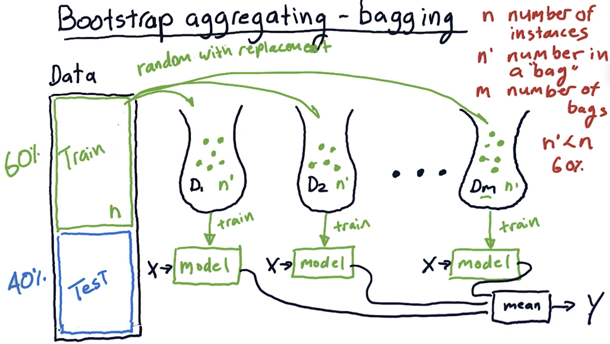

https://www.youtube.com/watch?v=2Mg8QD0F1dQ

### Features

- The most common application of bagging is **Random Forests**.
- It can use parallelism.
- Each model runs on a randomly selected subset of the data, and all models are trained independently of the others (contrast this with boosting).
- The primary goal of bagging is to **reduce variance**, so bagging does not necessarily improve predictive power; instead it is **mainly used to prevent overfitting**. 

### Example

Here the point it to predict the binary variable "Loan_Status".

This is a single decision tree

In [4]:
decision_clf = DecisionTreeClassifier()

# Fitting single decision tree
decision_clf.fit(X_train, y_train)
y_pred_decision = decision_clf.predict(X_test)
score_dt = roc_auc_score(y_test, y_pred_decision)

This is the bagging regressor

In [5]:
from sklearn.ensemble import BaggingClassifier
# from sklearn.ensemble import BaggingRegressor

bagging_clf2 = BaggingClassifier(DecisionTreeClassifier(), n_estimators=1000, max_samples=100, 
                                bootstrap=True, random_state=1)

bagging_clf2.fit(X_train, y_train)
y_pred_bagging = bagging_clf2.predict(X_test)
score_bc_dt = roc_auc_score(y_test, y_pred_bagging)

In [6]:
print("decision tree accuracy %.4f" %(score_dt))
print("bagging classifier (decision tree) accuracy %.4f" %(score_bc_dt))

decision tree accuracy 0.6136
bagging classifier (decision tree) accuracy 0.6798


### Parameters that control bagging

- Seed
- Row subsampling or bootstrapping
- Shuffling (because some models are sensitive to the order of the data)
- Column subsampling
- Model-specific parameters 
- Number of models (bags). More bags is generally better.